In [3]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [5]:
# 1. Análisis Exploratorio de Datos (EDA)

In [93]:
# Cargar los datos
df = pd.read_csv('CAR_DETAILS_FROM_CAR_DEKHO.csv')

In [95]:
# Inspeccionar los primeros datos
print(df.head())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [11]:
# Resumen estadístico de las variables numéricas
print(df.describe())

              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000


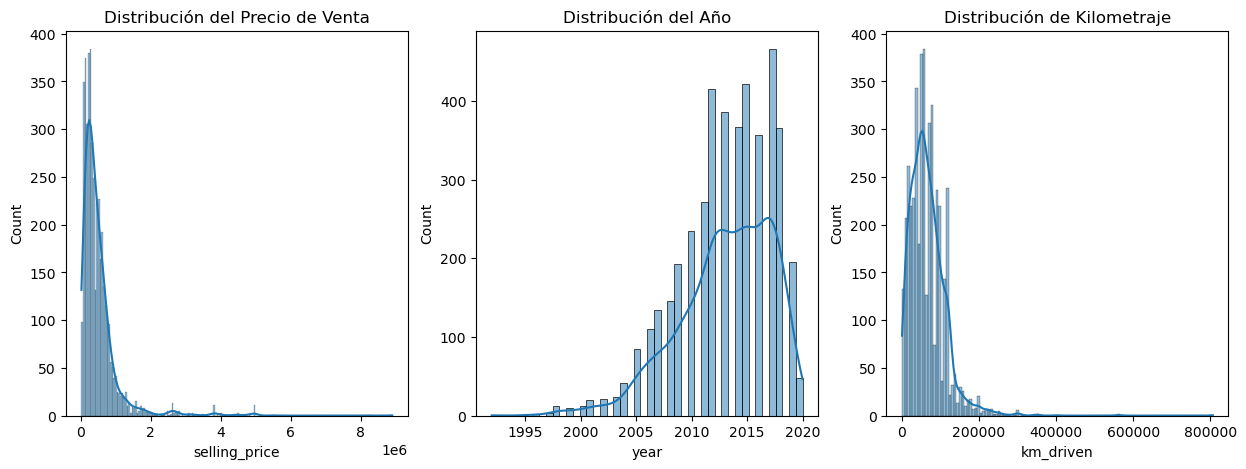

In [13]:
# Visualización de la distribución de 'selling_price', 'year', y 'km_driven'
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['selling_price'], kde=True)
plt.title('Distribución del Precio de Venta')

plt.subplot(1, 3, 2)
sns.histplot(df['year'], kde=True)
plt.title('Distribución del Año')

plt.subplot(1, 3, 3)
sns.histplot(df['km_driven'], kde=True)
plt.title('Distribución de Kilometraje')

plt.show()

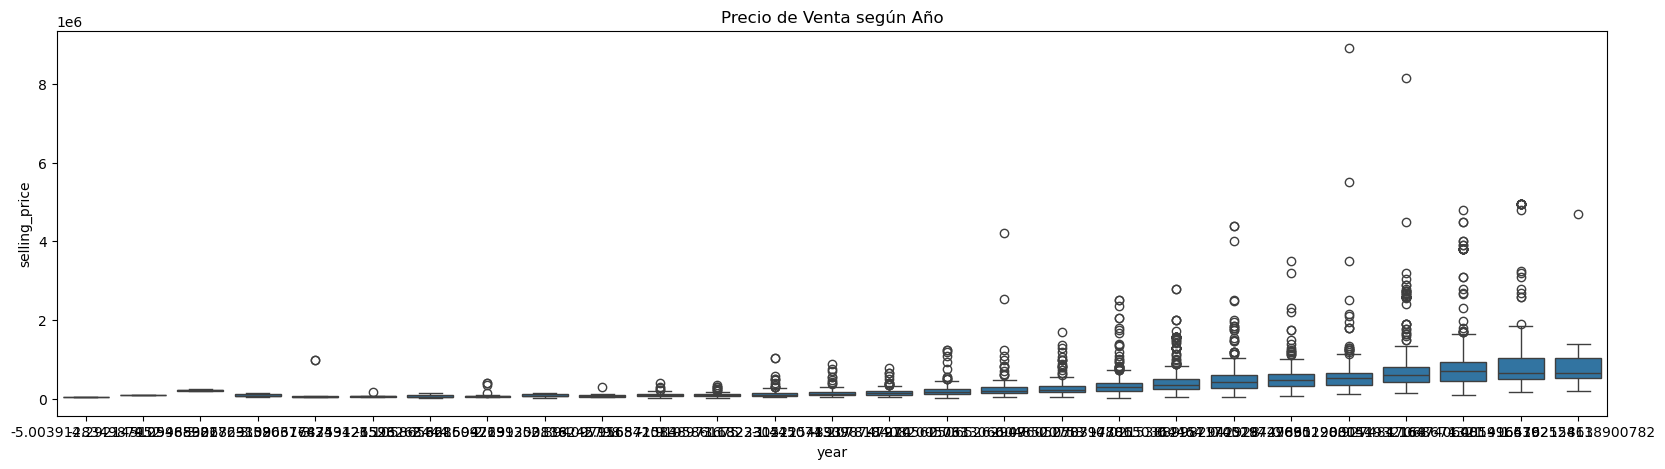

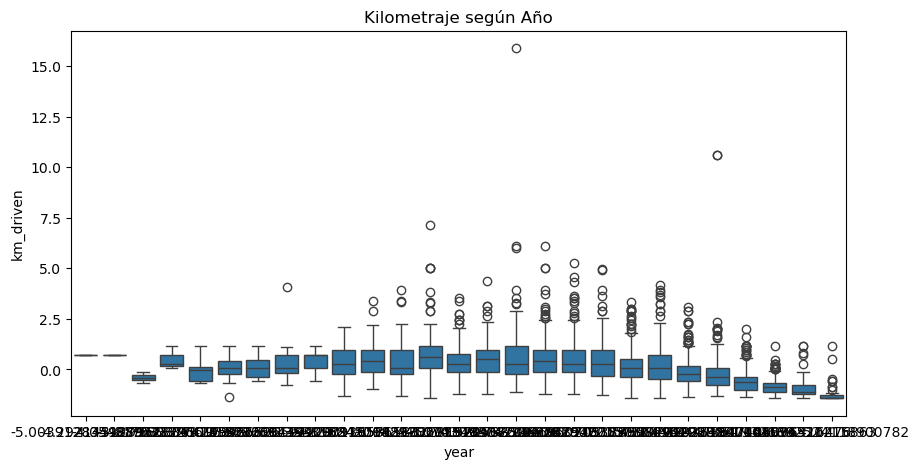

In [91]:
# Boxplots para detectar outliers
plt.figure(figsize=(20, 5))
sns.boxplot(x='year', y='selling_price', data=df)
plt.title('Precio de Venta según Año')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='year', y='km_driven', data=df)
plt.title('Kilometraje según Año')
plt.show()

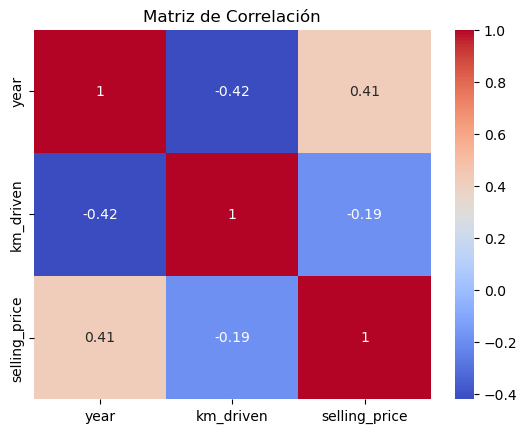

In [15]:
# Matriz de correlación entre variables
correlation_matrix = df[['year', 'km_driven', 'selling_price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Matriz de Correlación')
plt.show()

In [19]:
# 2. Preprocesamiento de Datos

In [21]:
# Revisar valores nulos
print(df.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [23]:
# rellenar o eliminar
df = df.dropna()

In [25]:
# Escalar 'year' y 'km_driven'
scaler = StandardScaler()
df[['year', 'km_driven']] = scaler.fit_transform(df[['year', 'km_driven']])

In [27]:
# 3. Selección de Características

In [29]:
 # Variables independientes
X = df[['year', 'km_driven']]

# Variable dependiente (target)
y = df['selling_price']         

In [31]:
# 4. Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# 5. Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# 6. Evaluación del Modelo

In [37]:
# Predicciones en el conjunto de test
y_pred = model.predict(X_test)

In [39]:
# Calcular RMSE y R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 505675.1215835868
R²: 0.162083137682265


In [41]:
# 7. Visualización de Resultados

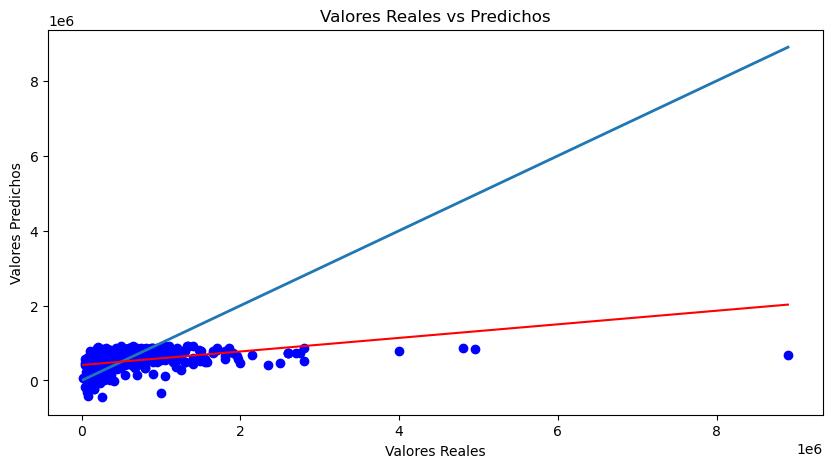

In [45]:
# Gráfica de valores reales vs valores predichos
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2)  # línea diagonal
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), 'r')  # línea de regresión
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos')
plt.show()

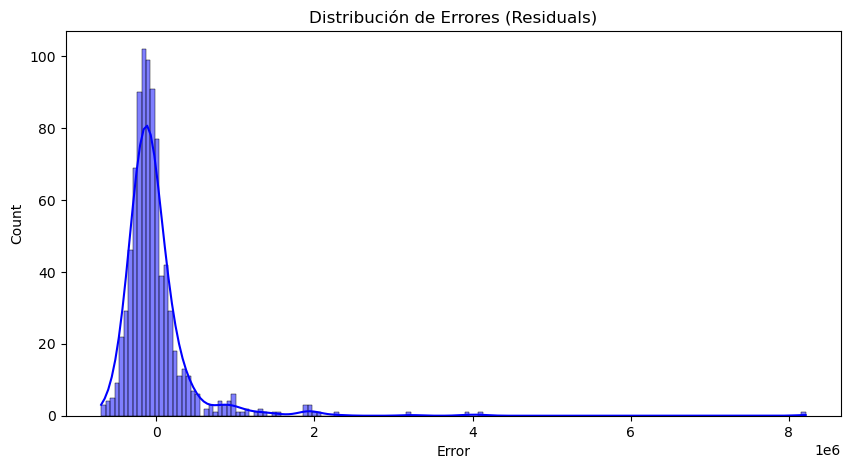

In [47]:
# Gráfica de errores (residuales)
errors = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(errors, kde=True, color='blue')
plt.title('Distribución de Errores (Residuals)')
plt.xlabel('Error')
plt.show()

In [49]:
# 8. Predecir precios para un nuevo conjunto

In [53]:
nuevo_x = np.array([[2025, 120000], [2026, 2000]])
# Escalar nuevo_x de la misma manera que las características de entrenamiento
nuevo_x_scaled = scaler.transform(nuevo_x)

predicion = model.predict(nuevo_x_scaled)

# Mostrar las predicciones
for i, pred in enumerate(predicion):
        print(f"Predicción {i + 1}: Para el año {nuevo_x[i][0]} y {nuevo_x[i][1]} km recorridos, el precio de venta estimado es: {pred:.2f}")

Predicción 1: Para el año 2025 y 120000 km recorridos, el precio de venta estimado es: 1161138.57
Predicción 2: Para el año 2026 y 2000 km recorridos, el precio de venta estimado es: 1254997.61


C:\Users\Andres\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Andres\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
